In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


/home/shaheer/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('Automobile_data.csv')

In [3]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

## Data Description
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [6]:
data.isnull().values.sum()

0

In [7]:
data.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

In [8]:
data.info

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd      

### Cleaning normalized-losses

In [9]:
a = data[data['normalized-losses']!='?']
b = (a['normalized-losses'].astype(int)).mean()
data['normalized-losses'] = data['normalized-losses'].replace('?',b).astype(int)

### Cleaning number of doors

In [10]:
data[data['num-of-doors']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,122,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [11]:
a=data[data['body-style']=='sedan']
a['num-of-doors'].value_counts()

four    79
two     15
?        2
Name: num-of-doors, dtype: int64

Since most of the sedan cars have four doors so I'm converting the missing values to 4 doors

In [12]:
a = data['num-of-doors'].map({'two':2,'four':4,'?':4})
data['num-of-doors'] = a

### Cleaning price

In [13]:
a = data[data['price']!='?']
b = (a['price'].astype(int)).mean()
data['price'] = data['price'].replace('?',b).astype(int)

### Cleaning horsepower

In [14]:
a = data[data['horsepower']!='?']
b = (a['horsepower'].astype(int)).mean()
data['horsepower'] = data['horsepower'].replace('?',b).astype(int)

### Cleaning bore

In [15]:
a = data[data['bore']!='?']
b = (a['bore'].astype(float)).mean()
data['bore'] = data['bore'].replace('?',b).astype(float)

### Cleaning stroke

In [16]:
a = data[data['stroke']!='?']
b = (a['stroke'].astype(float)).mean()
data['stroke'] = data['stroke'].replace('?',b).astype(float)

### Cleaning peak-rpm

In [17]:
a = data[data['peak-rpm']!='?']
b = (a['peak-rpm'].astype(float)).mean()
data['peak-rpm'] = data['peak-rpm'].replace('?',b).astype(float)

#### Coberting the num-of-cylinders column into numerical data

In [18]:
data['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [19]:
a = data['num-of-cylinders'].map({'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3})
data['num-of-cylinders'] = a

In [20]:
data.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.253659,5125.369458,25.219512,30.751220,13207.126829
std,1.245307,31.681008,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.519219,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


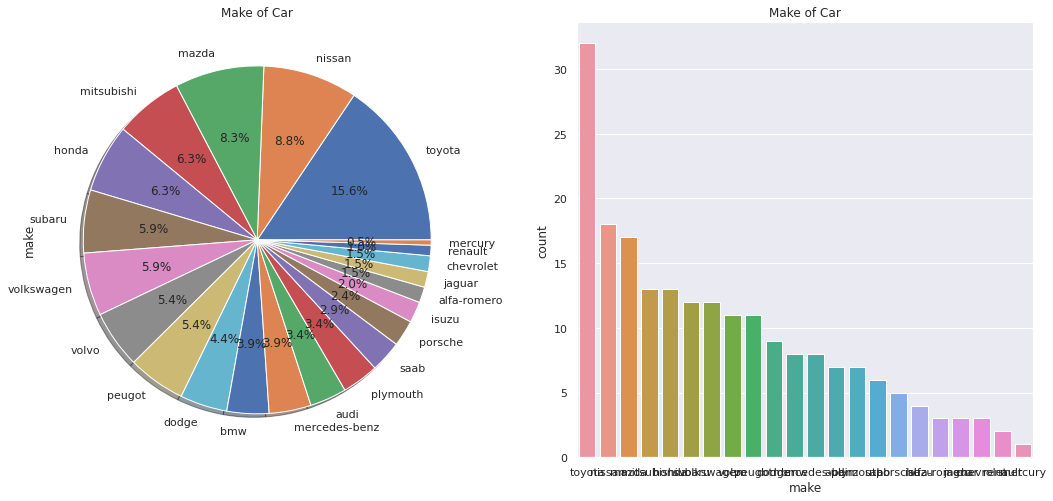

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['make'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Make of Car')
sns.countplot('make',data=data,ax=ax[1],order=data['make'].value_counts().index)
ax[1].set_title('Make of Car')
plt.show()

In [22]:
pd.crosstab(data['make'],data['fuel-type'],margins=True).T.style.background_gradient(cmap='summer_r')

make,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,All
fuel-type,,,,,,,,,,,,,,,,,,,,,,,
diesel,0,0,0,0,0,0,0,0,2,4,0,0,1,5,0,0,0,0,0,3,4,1,20
gas,3,7,8,3,9,13,4,3,15,4,1,13,17,6,7,5,2,6,12,29,8,10,185
All,3,7,8,3,9,13,4,3,17,8,1,13,18,11,7,5,2,6,12,32,12,11,205


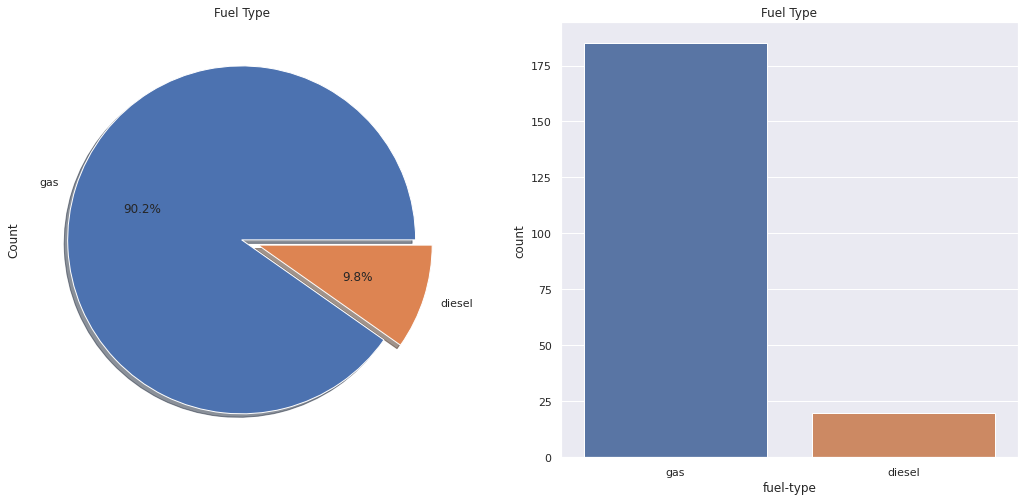

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['fuel-type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Fuel Type')
ax[0].set_ylabel('Count')
sns.countplot('fuel-type',data=data,ax=ax[1],order=data['fuel-type'].value_counts().index)
ax[1].set_title('Fuel Type')
plt.show()

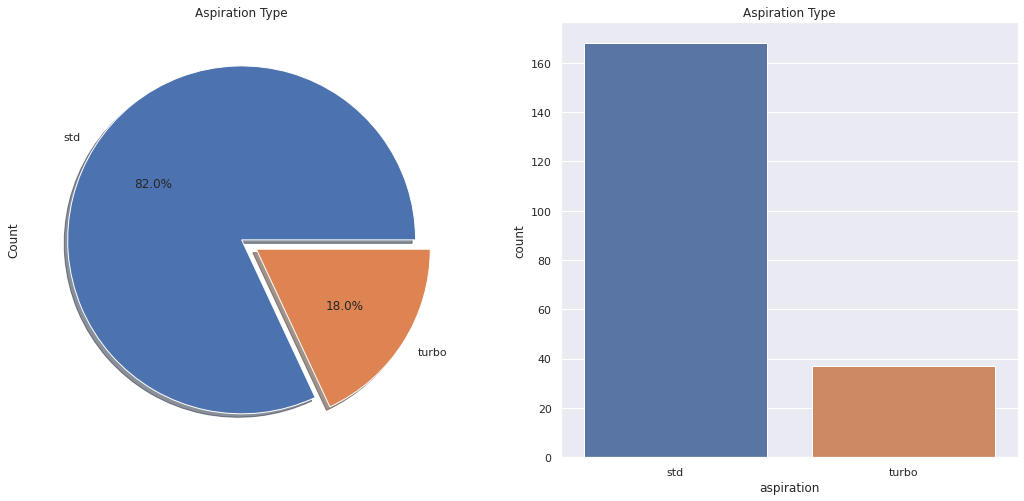

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['aspiration'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Aspiration Type')
ax[0].set_ylabel('Count')
sns.countplot('aspiration',data=data,ax=ax[1],order=data['aspiration'].value_counts().index)
ax[1].set_title('Aspiration Type')
plt.show()

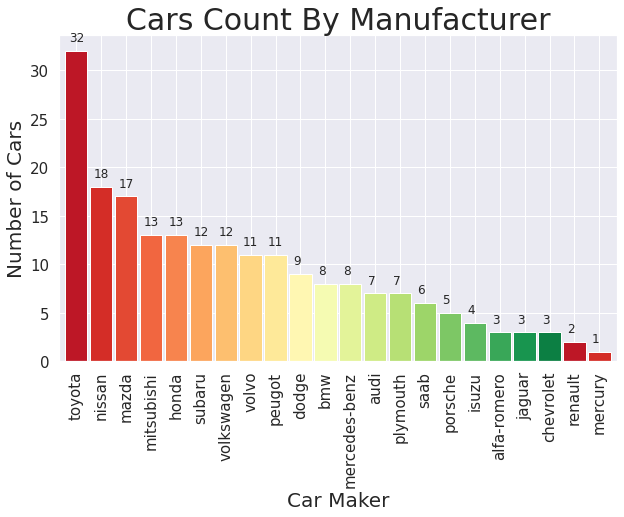

In [25]:
plt.subplots(figsize=(10,6))
ax=data['make'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Cars Count By Manufacturer',fontsize=30)
ax.tick_params(labelsize=15)
plt.show()
plt.show()

In [26]:
print('Different types of cars',data['body-style'].unique())

Different types of cars ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


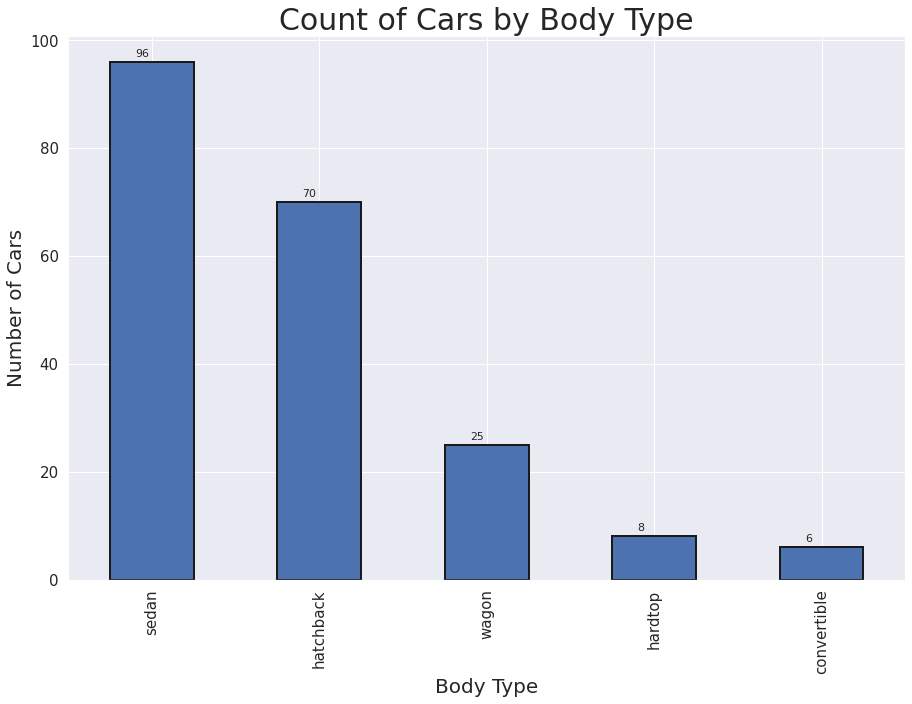

In [27]:
fig = plt.figure(figsize=(15, 10))
cars_type=data.groupby(['body-style']).count()['make']
ax=cars_type.sort_values(ascending=False).plot.bar(edgecolor='k',linewidth=2)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1),fontsize=11)
plt.xticks(rotation='vertical')
plt.xlabel('Body Type',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Count of Cars by Body Type',fontsize=30)
ax.tick_params(labelsize=15)
plt.show()

<Figure size 1800x1800 with 0 Axes>

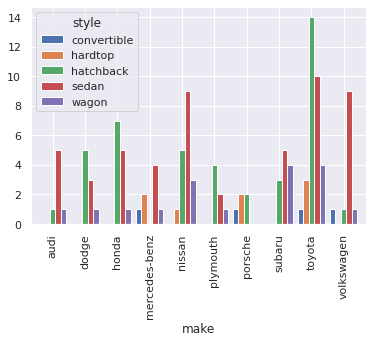

In [28]:
from matplotlib.pyplot import plot
fig = plt.figure(figsize=(25, 25))
a=data.groupby(['body-style','make']).count().reset_index();
a=a[['make','body-style','symboling']]
a.columns=['make','style','count']
a=a.pivot('make','style','count')
a.dropna(thresh=3).plot.bar(width=0.85);
plt.ioff()
plt.show()

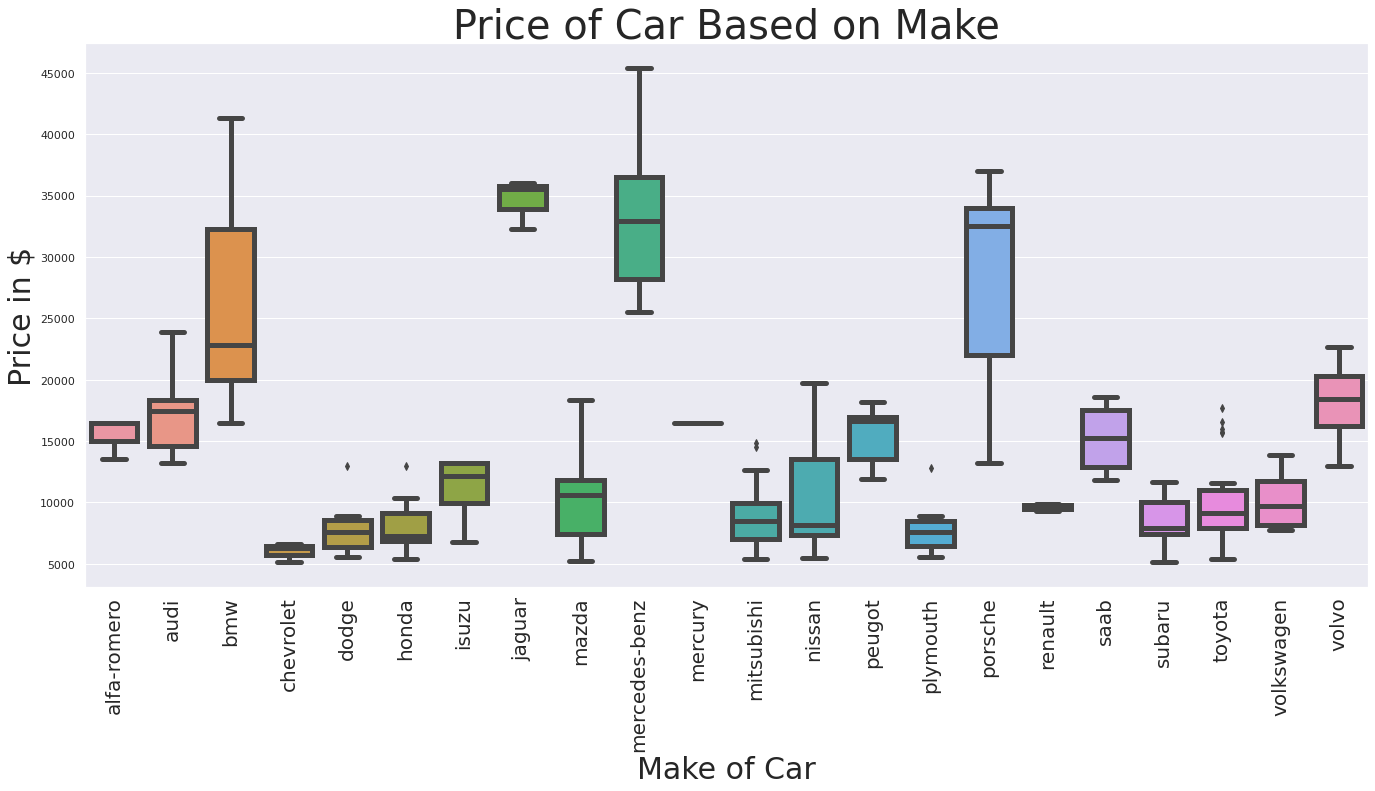

In [29]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=data,width=0.8,linewidth=5)
ax.set_xlabel('Make of Car',fontsize=30)
ax.set_ylabel('Price in $',fontsize=30)
plt.title('Price of Car Based on Make',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)

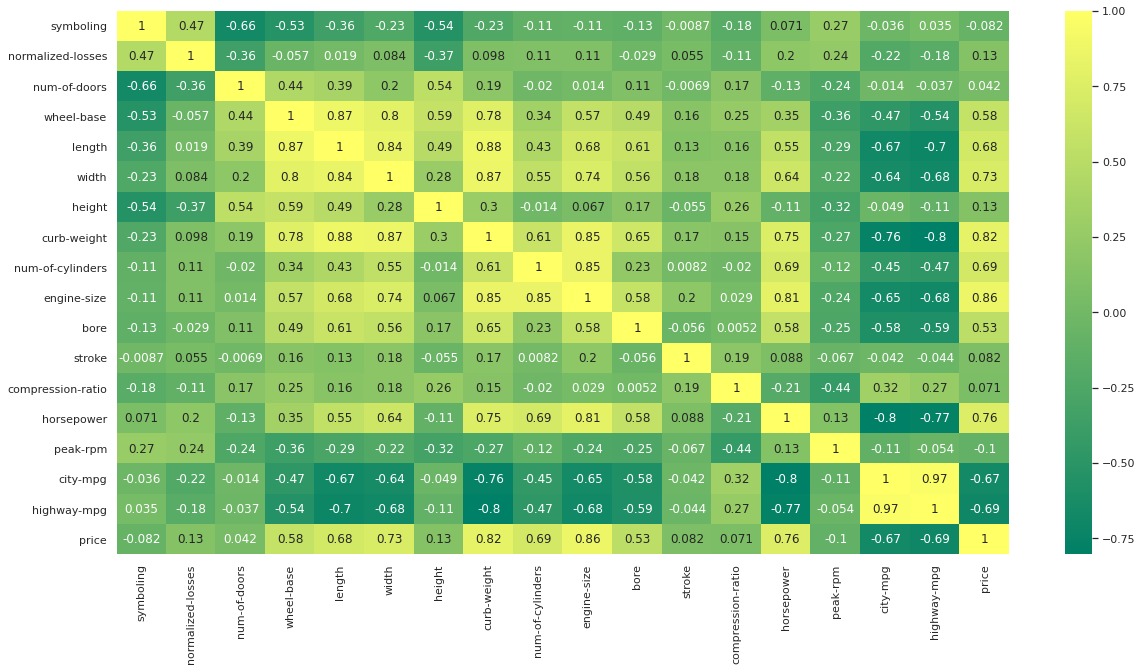

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='summer');

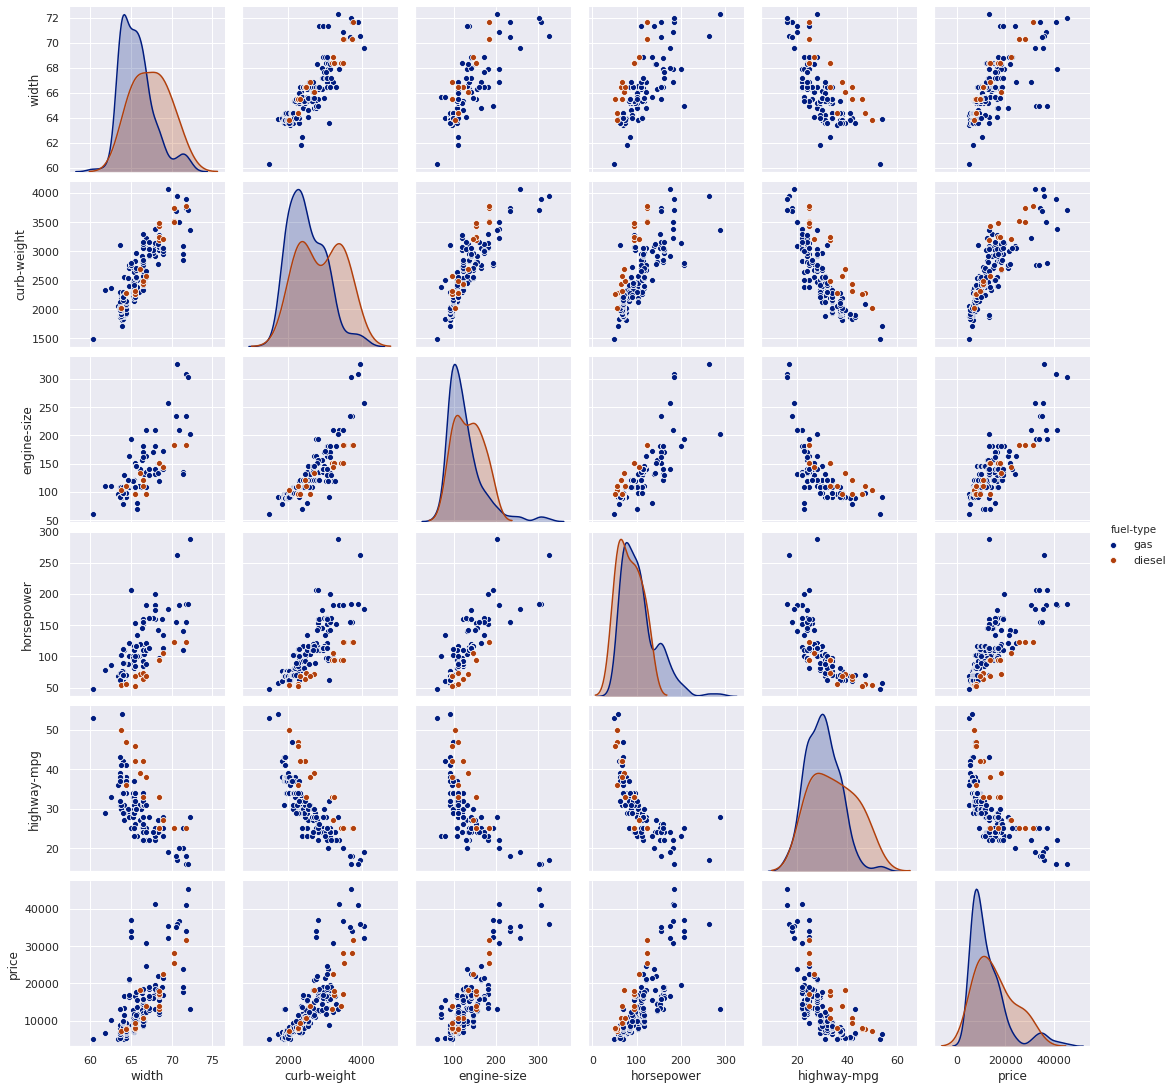

In [31]:
ax = sns.pairplot(data[["width", "curb-weight","engine-size","horsepower","highway-mpg","fuel-type","price",]], hue="fuel-type",palette='dark')

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [33]:
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [34]:
x = data[['normalized-losses','num-of-doors','curb-weight','num-of-cylinders','engine-size','bore','stroke','compression-ratio','peak-rpm','city-mpg','highway-mpg']]
y = data['price']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
preds = model.predict(x_test)

In [38]:
model.score(x_train,y_train)

0.8252337516953825

In [39]:
results = pd.DataFrame(preds,columns=['Predictions'])

In [40]:
results['y_test'] = y_test

In [41]:
results.head()

,Predictions,y_test
0,28169.634445,NaN
1,14913.607553,NaN
2,10838.730285,NaN
3,13330.591309,NaN
4,24839.757557,NaN


In [42]:
y_test = y_test.reset_index(drop=True)

In [43]:
results['y_test'] = y_test

In [44]:
results.head()

,Predictions,y_test
0,28169.634445,30760
1,14913.607553,13207
2,10838.730285,9549
3,13330.591309,11850
4,24839.757557,28248


In [45]:
results['Residuals'] = results['y_test'] - results['Predictions']
results['difference%'] = np.absolute(results['Residuals']/results['y_test']*100)

In [46]:
results.head()

,Predictions,y_test,Residuals,difference%
0,28169.634445,30760,2590.365555,8.421214
1,14913.607553,13207,-1706.607553,12.921993
2,10838.730285,9549,-1289.730285,13.506443
3,13330.591309,11850,-1480.591309,12.494441
4,24839.757557,28248,3408.242443,12.065429


In [47]:
results.describe()

,Predictions,y_test,Residuals,difference%
count,41.000000,41.000000,41.000000,41.000000
mean,13269.209301,13481.073171,211.863870,24.792605
std,8576.616699,8939.875901,3990.981371,27.809926
min,-2008.427524,5151.000000,-9614.245813,3.294847
25%,7552.054989,7898.000000,-1706.607553,8.421214
50%,10838.730285,9988.000000,-457.243125,15.717871
75%,16230.995676,13415.000000,1748.537144,29.910250
max,42658.200625,41315.000000,14014.339334,138.991022


In [48]:
results['difference%'].max()

138.9910216245642

TODO: Feature Engineering

In [49]:
clean_data = data

In [50]:
clean_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845
201,-1,95,volvo,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045
202,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485
203,-1,95,volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470


In [51]:
cars = pd.get_dummies(data['make'])

In [52]:
cars

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
cars.shape

(205, 22)

In [54]:
new_data = pd.concat([clean_data,cars],axis=1)

In [55]:
new_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,0,0,0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,0,0,0,0,0,0,0,0,0,0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,0,0,0,0,0,0,0,0,0,0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,0,0,0,0,0,0,0,0,0,0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,...,0,0,0,0,0,0,0,0,0,1
201,-1,95,volvo,gas,turbo,4,sedan,rwd,front,109.1,...,0,0,0,0,0,0,0,0,0,1
202,-1,95,volvo,gas,std,4,sedan,rwd,front,109.1,...,0,0,0,0,0,0,0,0,0,1
203,-1,95,volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,0,0,0,0,0,0,0,0,0,1


In [56]:
new_data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
alfa-romero          0
audi                 0
bmw                  0
chevrolet            0
dodge                0
honda                0
isuzu                0
jaguar               0
mazda                0
mercedes-benz        0
mercury              0
mitsubishi           0
nissan               0
peugot               0
plymouth             0
porsche              0
renault              0
saab       

In [57]:
new_data = new_data.drop('make',axis=1)

In [58]:
new_data.shape

(205, 47)

In [59]:
fuel = pd.get_dummies(data['fuel-type'])

In [60]:
fuel = fuel.drop('diesel',axis=1)

In [61]:
fuel

,gas
0,1
1,1
2,1
3,1
4,1
...,...
200,1
201,1
202,1
203,0


In [62]:
new_data = pd.concat([new_data,fuel],axis=1)

In [63]:
new_data = new_data.drop('fuel-type',axis=1)

In [64]:
new_data.shape

(205, 47)

In [65]:
asp = pd.get_dummies(data['aspiration'])

In [66]:
asp = asp.drop('std',axis=1)

In [67]:
new_data = pd.concat([new_data,asp],axis=1)

In [68]:
new_data = new_data.drop('aspiration',axis=1)

In [69]:
new_data.shape

(205, 47)

In [70]:
new_data.dtypes

symboling              int64
normalized-losses      int64
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
alfa-romero            uint8
audi                   uint8
bmw                    uint8
chevrolet              uint8
dodge                  uint8
honda                  uint8
isuzu                  uint8
jaguar                 uint8
mazda                  uint8
mercedes-benz          uint8
mercury                uint8
mitsubishi    

In [71]:
x = new_data[['normalized-losses','num-of-doors','curb-weight','num-of-cylinders',
          'engine-size','bore','stroke','compression-ratio','peak-rpm','city-mpg',
          'highway-mpg','alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
          'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan',
          'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
          'volkswagen', 'volvo', 'gas', 'turbo']]
y = new_data['price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
model.score(x_train,y_train)

0.9281020993359481

In [73]:
new_preds = model.predict(x_test)

In [74]:
new_results = pd.DataFrame(new_preds,columns=['Predictions'])

In [75]:
y_test = y_test.reset_index(drop=True)

In [76]:
new_results['y_test'] = y_test

In [77]:
new_results.head()

,Predictions,y_test
0,31615.911011,30760
1,18931.434394,13207
2,9646.297922,9549
3,11619.157503,11850
4,33964.678656,28248


In [78]:
new_results['Residuals'] = new_results['y_test'] - new_results['Predictions']
new_results['difference%'] = np.absolute(new_results['Residuals']/new_results['y_test']*100)

In [79]:
new_results.head()

,Predictions,y_test,Residuals,difference%
0,31615.911011,30760,-855.911011,2.782546
1,18931.434394,13207,-5724.434394,43.343942
2,9646.297922,9549,-97.297922,1.018933
3,11619.157503,11850,230.842497,1.948038
4,33964.678656,28248,-5716.678656,20.237463


In [80]:
new_results['difference%'].max()

51.593940448717355